### 네이버 영화 평점 기준 영화의 평점 변화.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup # 파싱, 선택
from urllib.request import urlopen,Request # html 파일 요청

In [23]:
# https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210329
url_base='https://movie.naver.com/'
url_sub='movie/sdb/rank/rmovie.nhn?sel=cur&date=20210301'

In [24]:
page = urlopen(url_base+url_sub)

In [25]:
page

In [26]:
soup = BeautifulSoup(page,'html.parser')

In [30]:
soup.find_all('div',class_='tit5')[0].a.string #a태그를 가지고와서 string으로 바꿔라

'디지몬 어드벤처 라스트 에볼루션 : 인연'

In [33]:
# point 처리
soup.find_all('td',class_='point')[0].string

'9.56'

In [34]:
len(soup.find_all('td',class_='point'))

49

In [39]:
# # 영화 제목 추출, 저장.
# movie_name=[]
# for n in range(0,49):
#     tmp_name = soup.find_all('div',class_='tit5')[n].a.string
#     movie_name.append(tmp_name)

#간지나는 내포된 for 문. 바깥의 []는 리스트를 만들라는 명령이다.
movie_name =[soup.find_all('div',class_='tit5')[n].a.string for n in range(0,49)] 
movie_name

['디지몬 어드벤처 라스트 에볼루션 : 인연',
 '원더',
 '극장판 바이올렛 에버가든',
 '송가인 더 드라마',
 '서유기 2 - 선리기연',
 '부활: 그 증거',
 '소울',
 '엽기적인 그녀',
 '극장판 귀멸의 칼날: 무한열차편',
 '서유기 - 월광보합',
 '해피 투게더',
 '러브레터',
 '싸이코',
 '타오르는 여인의 초상',
 '온워드: 단 하루의 기적',
 '남매의 여름밤',
 '러브 액츄얼리',
 '너의 이름은.',
 '화양연화',
 '찬실이는 복도 많지',
 '아티스트',
 '현기증',
 '캐롤',
 '분노',
 '세자매',
 '아비정전',
 '뮨: 달의 요정',
 '원챈스',
 '비포 미드나잇',
 '클로저',
 '폭스캐처',
 '하나와 앨리스',
 '더 울프 오브 월 스트리트',
 '해리 포터와 불의 잔',
 '일대종사',
 '날씨의 아이',
 '그레이트 뷰티',
 '별을 쫓는 아이',
 '톰과 제리',
 '철벽선생',
 '미션 파서블',
 '아메리칸 허슬',
 '더블패티',
 '더 프롬',
 '은혼',
 '새해전야',
 '펭귄 하이웨이',
 '카오스 워킹',
 '몬스터 헌터']

In [40]:
#내포된 포문 [식 for n in range(0,49) 조건(if)]
movie_point =\
[soup.find_all('td',class_='point')[n].string for n in range(0,49)]
movie_point

['9.56',
 '9.51',
 '9.50',
 '9.43',
 '9.36',
 '9.34',
 '9.31',
 '9.30',
 '9.25',
 '9.21',
 '9.19',
 '9.12',
 '9.10',
 '9.06',
 '9.00',
 '8.96',
 '8.93',
 '8.79',
 '8.78',
 '8.73',
 '8.72',
 '8.72',
 '8.60',
 '8.55',
 '8.52',
 '8.48',
 '8.36',
 '8.32',
 '8.19',
 '8.18',
 '8.17',
 '8.11',
 '8.05',
 '8.03',
 '8.00',
 '7.95',
 '7.93',
 '7.92',
 '7.79',
 '7.77',
 '7.66',
 '7.50',
 '7.29',
 '7.27',
 '7.20',
 '7.13',
 '6.72',
 '6.31',
 '6.02']

### 2020년 12월 1일부터 100일간 데이터 추출
- 영화별 평점 변화를 차트에다 출력


In [43]:
# 2020-12-01부터 100일간 연속값 생성
#pandas.date_range 개중요
date = pd.date_range('20200214', periods=100, freq='D')

In [44]:
date

DatetimeIndex(['2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
      

In [47]:
# 2020-12-01부터 100일간 연속값 생성
#pandas.date_range 개중요
date = pd.date_range('20201201', periods=100, freq='D')

In [48]:
date

DatetimeIndex(['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12',
               '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20',
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15', '2021-01-16', '2021-01-17',
               '2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21',
               '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25',
      

In [52]:
url_base='https://movie.naver.com/'
url_sub='movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
url_ = url_base+url_sub
tmp =urlopen(url_.format(date = '20201201'))
soup = BeautifulSoup(tmp,'html.parser')
soup.find_all('td',class_='point')[0].string

'9.51'

In [57]:
date[0].strftime('%Y%m%d')

'20201201'

In [61]:
import urllib
from tqdm import tqdm
#날짜, 제목, 평점 추출해서 저장
url_base='https://movie.naver.com/'
url_sub='movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
movie_date=[]
movie_name=[]
movie_point=[]

for today in tqdm(date):
    url_ = url_base+url_sub
    res=urlopen(url_.format(date = today.strftime('%Y%m%d')))
    #파싱
    soup = BeautifulSoup(res,'html.parser')
    end = len(soup.find_all('td','point'))
    #리스트 째로 들어가려면 extend() 하나의 원소만 넣으려면 append()
    movie_date.extend([today for n in range(0,end)])
    movie_name.extend([soup.find_all('div',class_='tit5')[n].a.string for n in range(0,end)])
    movie_point.extend([soup.find_all('td',class_='point')[n].string for n in range(0,end)])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:28<00:00,  1.13it/s]


In [71]:

len(movie_date),len(movie_name),len(movie_point)

(4767, 4767, 4767)

In [70]:
movie_name[45:55]

['프리키 데스데이',
 '기기괴괴 성형수',
 '그린랜드',
 '이웃사촌',
 '오케이 마담',
 '극장판 바이올렛 에버가든',
 '부활: 그 증거',
 '소년시절의 너',
 '페이트 스테이 나이트 헤븐즈필 III.스프링 송',
 '톰보이']

In [103]:
movie_df = pd.DataFrame(
    {
        'date' : movie_date
        ,'name': movie_name
        ,'point':movie_point
        
    }
)
movie_df.head()

,date,name,point
0,2020-12-01,극장판 바이올렛 에버가든,9.51
1,2020-12-01,부활: 그 증거,9.43
2,2020-12-01,소년시절의 너,9.40
3,2020-12-01,페이트 스테이 나이트 헤븐즈필 III.스프링 송,9.23
4,2020-12-01,톰보이,9.20


In [104]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4767 entries, 0 to 4766
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4767 non-null   datetime64[ns]
 1   name    4767 non-null   object        
 2   point   4767 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 111.9+ KB


In [105]:
#point는 object에서 float으로 바꿔줘야한다.
#컬럼 하나는 ndarray
movie_df['point'] = movie_df['point'].astype('float')
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4767 entries, 0 to 4766
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4767 non-null   datetime64[ns]
 1   name    4767 non-null   object        
 2   point   4767 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 111.9+ KB


In [106]:
import numpy as np
# 영화별 평점의 합을 구하자.
movie_unique = pd.pivot_table(movie_df, index=['name'],aggfunc=np.sum)
movie_unique.head()

,point
name,
1917,168.41
69세,43.15
800,50.55
가나의 혼인잔치: 언약,379.81
"가장 따뜻한 색, 블루",114.01


In [107]:
movie_best = movie_unique.sort_values(by=['point'], ascending=False)
movie_best

,point
name,
극장판 바이올렛 에버가든,950.53
너의 췌장을 먹고 싶어,943.29
부활: 그 증거,938.61
남매의 여름밤,886.81
타오르는 여인의 초상,851.70
...,...
아가씨,7.14
소리도 없이,5.63
레이니 데이 인 뉴욕,5.54


In [108]:
movie_df.head()

,date,name,point
0,2020-12-01,극장판 바이올렛 에버가든,9.51
1,2020-12-01,부활: 그 증거,9.43
2,2020-12-01,소년시절의 너,9.40
3,2020-12-01,페이트 스테이 나이트 헤븐즈필 III.스프링 송,9.23
4,2020-12-01,톰보이,9.20


In [109]:
#query 내부의 대괄호는 큰따옴표로 싸야한다.
tmp =movie_df.query('name==["부활: 그 증거"]')
tmp

,date,name,point
1,2020-12-01,부활: 그 증거,9.43
51,2020-12-02,부활: 그 증거,9.41
100,2020-12-03,부활: 그 증거,9.41
150,2020-12-04,부활: 그 증거,9.41
200,2020-12-05,부활: 그 증거,9.41
...,...,...,...
4521,2021-03-06,부활: 그 증거,9.34
4570,2021-03-07,부활: 그 증거,9.34
4621,2021-03-08,부활: 그 증거,9.34
4671,2021-03-09,부활: 그 증거,9.34


In [110]:
import matplotlib.pyplot as plt

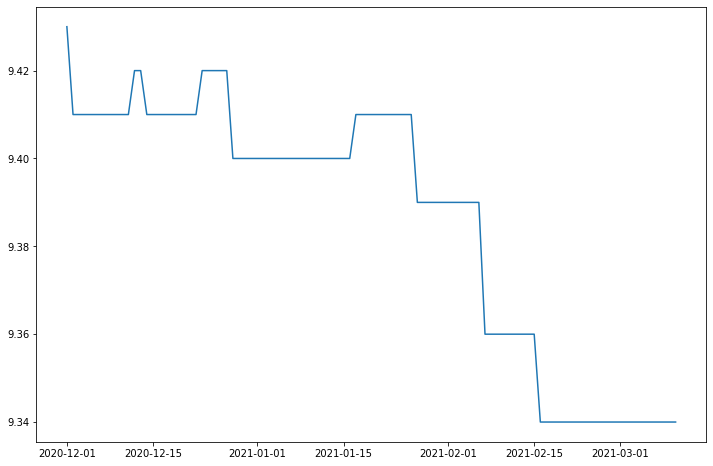

In [113]:
plt.figure(figsize=(12,8))
plt.plot(tmp['date'],tmp['point'])
plt.show()

In [ ]:
movie_best.head()

In [114]:
#영화별 날짜 변화에 따른 평점 변화 확인.
#pivot으로 해야합니다. index=date, column = name, value= point
movie_pivot = pd.pivot_table(
    movie_df
    ,index = ['date']
    ,columns=['name']
    ,values=['point']
)

In [116]:
movie_pivot.head()

point                                                               \
name        1917 69세 800 가나의 혼인잔치: 언약 가장 따뜻한 색, 블루 경계선 굿바이 귀여운 여인  그녀 그레이트 뷰티   
date                                                                            
2020-12-01  8.86 NaN NaN          NaN          NaN NaN NaN    8.7 NaN     NaN   
2020-12-02  8.86 NaN NaN          NaN          NaN NaN NaN    8.7 NaN     NaN   
2020-12-03  8.86 NaN NaN          NaN          NaN NaN NaN    8.7 NaN     NaN   
2020-12-04  8.86 NaN NaN          NaN          NaN NaN NaN    8.7 NaN     NaN   
2020-12-05  8.86 NaN NaN          NaN          NaN NaN NaN    8.7 NaN     NaN   

            ...                                                             \
name        ... 피아노 피아니스트의 전설 하나와 앨리스 해리 포터와 불의 잔 해리가 샐리를 만났을 때 해피 투게더 현기증   
date        ...                                                              
2020-12-01  ... NaN       NaN     NaN         NaN          8.89    NaN NaN   
2020-12-02  ... NaN       NaN     NaN         NaN          8.89    NaN NaN   
2020-12-03  ... NaN       NaN     NaN         NaN          8.89    NaN NaN   
2020-12-04  ... NaN       NaN     NaN         NaN          8.89    NaN NaN   
2020-12-05  ... NaN       NaN     NaN         NaN          8.89    NaN NaN   

                                    
name        협상 호랑이보다 무서운 겨울손님 화양연화  
date                                
2020-12-01 NaN           7.03  NaN  
2020-12-02 NaN           7.03  NaN  
2020-12-03 NaN           7.03  NaN  
2020-12-04 NaN            NaN  NaN  
2020-12-05 NaN            NaN  NaN  

[5 rows x 187 columns]

In [117]:
movie_pivot.columns=movie_pivot.columns.droplevel()

In [119]:
movie_pivot.head(1)

name,1917,69세,800,가나의 혼인잔치: 언약,"가장 따뜻한 색, 블루",경계선,굿바이,귀여운 여인,그녀,그레이트 뷰티,...,피아노,피아니스트의 전설,하나와 앨리스,해리 포터와 불의 잔,해리가 샐리를 만났을 때,해피 투게더,현기증,협상,호랑이보다 무서운 겨울손님,화양연화
date,,,,,,,,,,,,,,,,,,,,,
2020-12-01,8.86,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,8.89,NaN,NaN,NaN,7.03,NaN


In [122]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

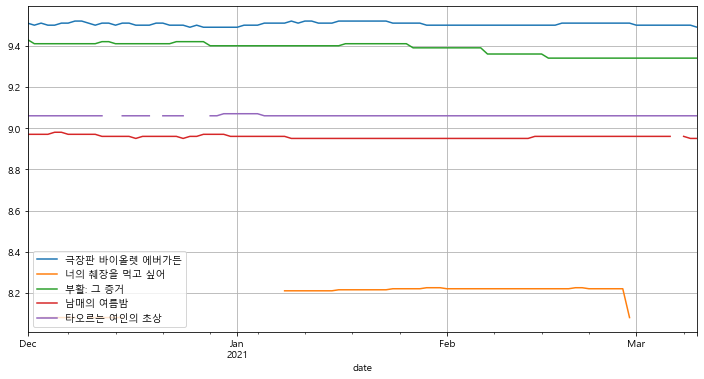

In [126]:
movie_pivot.plot(y=['극장판 바이올렛 에버가든','너의 췌장을 먹고 싶어', '부활: 그 증거', '남매의 여름밤', '타오르는 여인의 초상'],figsize=(12,6))
plt.legend(loc='best')
plt.grid()
plt.show()